In [23]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import time


opening image

In [ ]:
#PIL
from PIL import Image
im = Image.open("/Users/regatte/Documents/MY GITHUB/SEM_5/303L AI & ML/lab_1/part 2/lion1.png")
im.show()

In [ ]:
#openCV
import cv2
img = cv2.imread("/content/lion1.png")
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


PROPERTIES OF AN IMAGE

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
print(img.size)

150975


In [ ]:
print(img.shape)
#height, width, number of channels

(275, 183, 3)


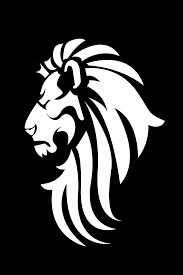

In [ ]:
#converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

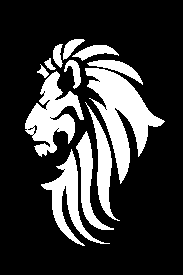

In [ ]:
#rgb to binary
ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
cv2_imshow(bw_img)

Download, read and visualize 3D medical Images belong to the formats DICOM, MHA

In [10]:
!curl -OL /content/bmode.dcm
!ls -l bmode.dcm

curl: (3) <url> malformed
-rw-r--r-- 1 root root 27473814 Aug 14 03:30 bmode.dcm


In [12]:
pip install -q tensorflow-io

     |████████████████████████████████| 22.3MB 1.5MB/s 


In [13]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

TypeError: ignored

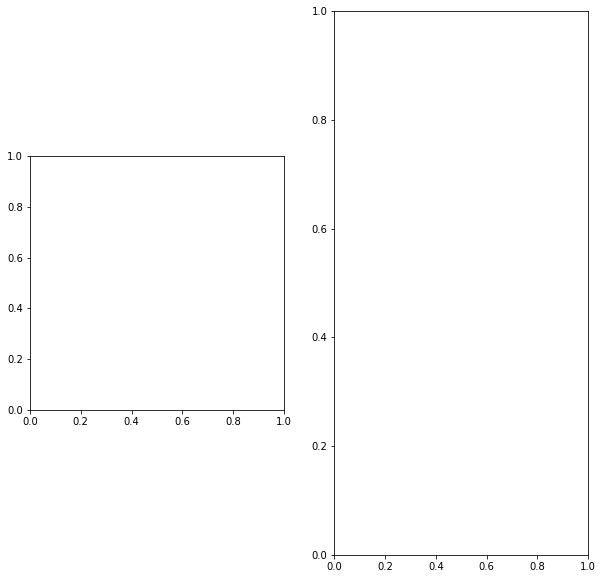

In [14]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('bmode.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

VIDEO FORMATS

In [30]:
import numpy
import cv2

def print_capture_properties(*args):
    capture = cv2.VideoCapture(*args)
    print('Created capture:', ' '.join(map(str, args)))
    print('Frame count:', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))
    print('Frame width:', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
    print('Frame height:', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    print('Frame rate:', capture.get(cv2.CAP_PROP_FPS))

In [19]:
print_capture_properties('/content/514503.mp4')

Created capture: /content/514503.mp4
Frame count: 1425
Frame width: 1920
Frame height: 1080
Frame rate: 25.0


video to image frames


In [24]:
def video_to_frames(input_loc, output_loc):

    try:
        os.mkdir(output_loc)
    except OSError:
        pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(input_loc)
    # Find the number of frames
    video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    # Start converting the video
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        # Write the results back to output location.
        cv2.imwrite(output_loc + "/%#05d.jpg" % (count+1), frame)
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

if __name__=="__main__":

    input_loc = '/content/514503.mp4'
    output_loc = '/content/images'
    video_to_frames(input_loc, output_loc)

Number of frames:  1424
Converting video..

Done extracting frames.
1424 frames extracted
It took 64 seconds forconversion.


In [32]:
import glob
 
img_array = []
for filename in glob.glob('/content/images'):
    capture = cv2.VideoCapture()
    img = cv2.imread(filename)
    size = (int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)) , int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

AUDIO DATA FORMATS

In [36]:
!pip install librosa

In [37]:
import IPython.display as ipd

import librosa

import librosa.display

import matplotlib.pyplot as plt

In [38]:
ipd.Audio('/content/Prismo - Solo.mp3')

In [39]:
plt.figure(figsize=(15,4))
filename = '/content/Prismo - Solo.mp3'
data,sample_rate1 = librosa.load(filename, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')

<Figure size 1080x288 with 0 Axes>

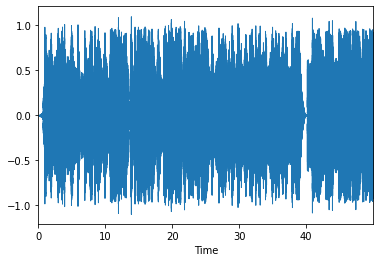

In [40]:
librosa.display.waveplot(data,sr=sample_rate1, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000)

TEXT DATA